In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [32]:
#let's get information from our processed prosodic data
prosoDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/accomodation/conversationsGrouped.jsonl", orient="records", lines=True)
#just load in the conversation-level data 
#turnDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/speakerTurns/mayJuneSpeakerTurns.jsonl",orient="records", lines=True)

In [40]:
prosoDf.columns

Index(['mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3',
       'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz', 'firstSpeaker',
       'content', 'speakerDuration', 'speakingRate', 'contentLen', 'saidHost',
       'saidGuest', 'topSpeakers', 'topSpeakerProps', 'potentialOutPath',
       'rssUrl', 'epTitle', 'title', 'epDescription', 'category1', 'category2',
       'duration', 'parsedDuration', 'hostPredictedNames',
       'guestPredictedNames', 'neitherPredictedNames', 'uniqueHosts',
       'uniqueGuests', 'numSpeakers'],
      dtype='object')

In [42]:
len(prosoDf["potentialOutPath"].unique())

365085

In [41]:
prosoDf.drop_duplicates(subset=["potentialOutPath"])["numSpeakers"].value_counts()  

numSpeakers
2     143108
1     135981
3      53932
4      19893
5       7307
6       2900
7       1185
8        515
9        159
10        81
11        18
12         6
Name: count, dtype: int64

In [38]:
prosoDf["numSpeakers"].value_counts() 

numSpeakers
2     285491
1     163757
3     107625
4      39707
5      14594
6       5795
7       2367
8       1030
9        318
10       162
11        36
12        12
Name: count, dtype: int64

In [43]:
hgCounts = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/descriptiveFigures/hostGuestCount.csv")

In [44]:
hgCounts.head()  

,category1,uniqueGuests,uniqueHosts
0,music,NaN,1.0
1,music,NaN,1.0
2,music,NaN,1.0
3,music,NaN,1.0
4,music,1.0,1.0


In [17]:
hgCounts = hgCounts.fillna(0)

#we want long format to work with seaborn 
countsLong = hgCounts.melt(id_vars="category1")

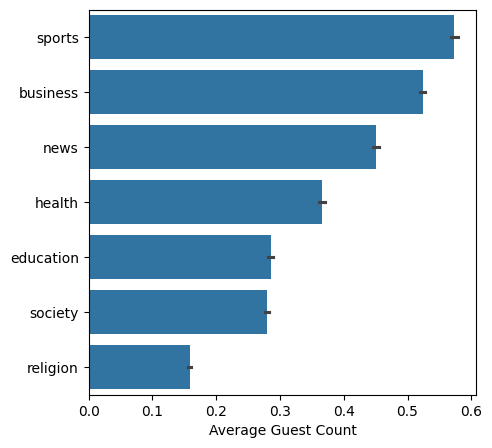

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(data=countsLong[countsLong["variable"] == "uniqueGuests"], x="value", y="category1", order=["sports", "business", "news", "health", "education", "society", "religion"], estimator="mean", ax=ax) 
ax.set_xlabel("Average Guest Count")
ax.set_ylabel(None)

outPath = "/shared/3/projects/benlitterer/podcastData/figures/hostGuestNetwork/guestCountFigure"
plt.savefig(f"{outPath}.pdf", bbox_inches="tight") 
plt.savefig(f"{outPath}.png", bbox_inches="tight", dpi=800) 

In [19]:
hgCounts = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/descriptiveFigures/hostGuestCount.csv")

In [20]:
hgCounts[["uniqueGuests", "uniqueHosts"]] = hgCounts[["uniqueGuests", "uniqueHosts"]].fillna(0)

In [21]:
hgCounts["dummy"] = 1

In [22]:
#create heatmap of number of guest predictions in each category 
order=["sports", "business", "news", "health", "education", "society", "religion"]
catGuests = hgCounts[["category1", "uniqueGuests", "dummy"]].groupby(["category1", "uniqueGuests"]).aggregate(sum).reset_index()
catGuests = catGuests[(catGuests["category1"].isin(order)) & (catGuests["uniqueGuests"] <= 3)]
catGuests = catGuests.pivot(index="category1", columns="uniqueGuests").droplevel(level=0, axis=1)

#normalize rows to get proportions within each row 
catGuests["totalPreds"] = catGuests.apply("sum", axis=1)
catGuests = catGuests.apply(lambda x: x / catGuests["totalPreds"], axis=0)
catGuests = catGuests.drop(columns=["totalPreds"]) 



/tmp/ipykernel_1092367/378856919.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  catGuests = hgCounts[["category1", "uniqueGuests", "dummy"]].groupby(["category1", "uniqueGuests"]).aggregate(sum).reset_index()


In [23]:
order=["sports", "business", "news", "health", "education", "society", "religion"]
catHosts = hgCounts[["category1", "uniqueHosts", "dummy"]].groupby(["category1", "uniqueHosts"]).aggregate(sum).reset_index()
catHosts = catHosts[(catHosts["category1"].isin(order)) & (catHosts["uniqueHosts"] <= 3)]
catHosts = catHosts.pivot(index="category1", columns="uniqueHosts").droplevel(level=0, axis=1)

#normalize rows to get proportions within each row 
catHostsMod = catHosts.drop(columns=0)
catHostsMod["totalPreds"] = catHostsMod.apply("sum", axis=1)
catHostsMod = catHostsMod.apply(lambda x: x / catHostsMod["totalPreds"], axis=0)
catHostsMod = catHostsMod.drop(columns=["totalPreds"])


catHosts = catHosts.drop(columns=0)
catHosts["totalPreds"] = catHosts.apply("sum", axis=1)
catHosts = catHosts.apply(lambda x: x / catHosts["totalPreds"], axis=0)
catHosts = catHosts.drop(columns=["totalPreds"]) 

/tmp/ipykernel_1092367/1637702424.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  catHosts = hgCounts[["category1", "uniqueHosts", "dummy"]].groupby(["category1", "uniqueHosts"]).aggregate(sum).reset_index()


In [24]:
countsLong

,category1,variable,value
0,music,uniqueGuests,0.0
1,music,uniqueGuests,0.0
2,music,uniqueGuests,0.0
3,music,uniqueGuests,0.0
4,music,uniqueGuests,1.0
...,...,...,...
2248111,leisure,uniqueHosts,1.0
2248112,leisure,uniqueHosts,1.0
2248113,leisure,uniqueHosts,0.0
2248114,comedy,uniqueHosts,0.0


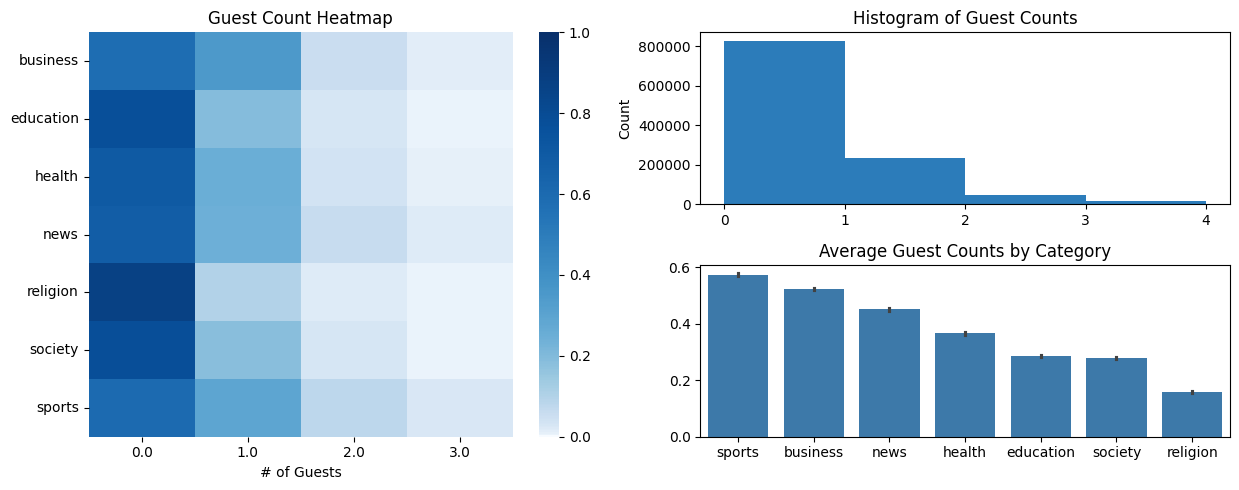

In [26]:
#fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
fig = plt.figure(figsize=(12.5, 5))
gs = fig.add_gridspec(2, 2, figure=fig)
blueMap = colormaps.get_cmap("Blues")

# Define a non-linear scaling function (gamma correction) 
gamma = 0.5  # You can adjust this value; gamma < 1 emphasizes smaller values
scaled_values = np.linspace(0, 1, 256) ** gamma

# Rescale the colormap to adjust the range
# Here, we're setting it to start at a darker blue instead of pure white
rescaled_blueMap = mpl.colors.LinearSegmentedColormap.from_list(
    'rescaled_blues', blueMap(scaled_values)
)

ax1 = fig.add_subplot(gs[:, 0])
sns.heatmap(catGuests, vmin=0, vmax=1, cmap=rescaled_blueMap, ax=ax1) 
ax1.set_title("Guest Count Heatmap")
ax1.set_xlabel("# of Guests")
ax1.set_ylabel(None)


ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(countsLong[(countsLong["variable"] == "uniqueGuests") & (countsLong["value"] <= 5)], bins=np.arange(0, 5, 1), edgecolor=None, palette=[rescaled_blueMap(.5)], alpha=1, ax=ax2)
ax2.set_xticks(np.arange(0, 5, 1))
ax2.set_title("Histogram of Guest Counts")
ax2.get_legend().remove()
ax2.set_xlabel(None)

ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(data=countsLong[countsLong["variable"] == "uniqueGuests"], x="category1", y="value" , order=["sports", "business", "news", "health", "education", "society", "religion"], estimator="mean", ax=ax3, color=rescaled_blueMap(.5)) 
ax3.set_title("Average Guest Counts by Category")
ax3.set_xlabel(None)
ax3.set_ylabel(None)
plt.tight_layout()

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/descriptiveFigures/GuestCountsFigure.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/descriptiveFigures/GuestCountsFigure.png", bbox_inches="tight", dpi=800) 

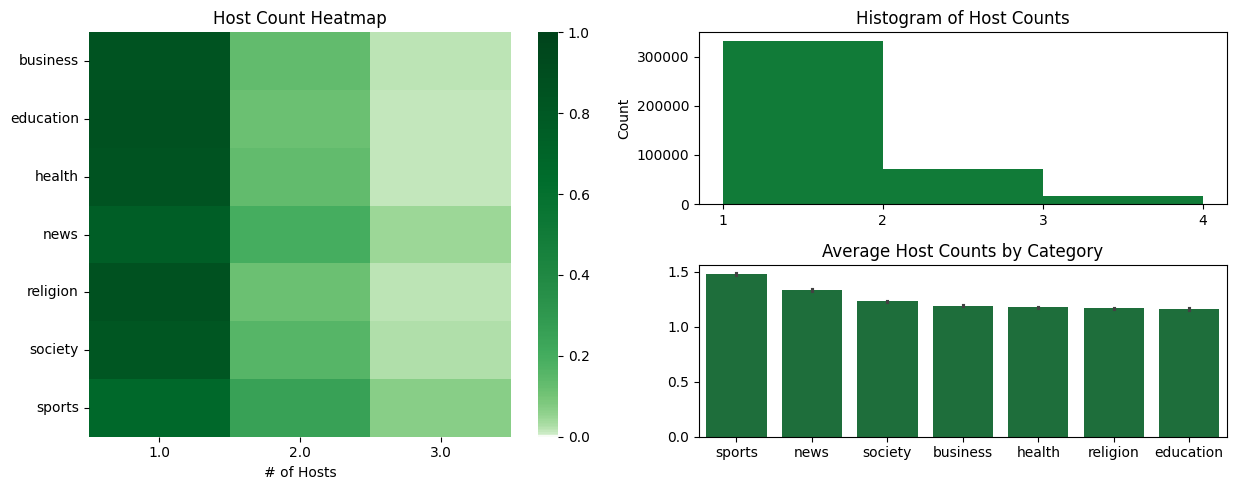

In [27]:
#fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
fig = plt.figure(figsize=(12.5, 5))
gs = fig.add_gridspec(2, 2, figure=fig)

greenMap = colormaps.get_cmap("Greens")

# Define a non-linear scaling function (gamma correction) 
gamma = 0.3  # You can adjust this value; gamma < 1 emphasizes smaller values
scaled_values = np.linspace(0, 1, 256) ** gamma

# Rescale the colormap to adjust the range
# Here, we're setting it to start at a darker blue instead of pure white
rescaled_greenMap = mpl.colors.LinearSegmentedColormap.from_list(
    'rescaled_greens', greenMap(scaled_values)
)

ax1 = fig.add_subplot(gs[:, 0])
sns.heatmap(catHostsMod, vmin=0, vmax=1, cmap=rescaled_greenMap, ax=ax1) 
ax1.set_title("Host Count Heatmap")
ax1.set_xlabel("# of Hosts")
ax1.set_ylabel(None)


ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(countsLong[(countsLong["variable"] == "uniqueHosts") & (countsLong["value"] > 0) & (countsLong["value"] <= 5)], bins=np.arange(1, 5, 1), edgecolor=None, palette=[rescaled_greenMap(.5)], alpha=1, ax=ax2)
ax2.set_xticks(np.arange(1, 5, 1))
ax2.set_title("Histogram of Host Counts")
ax2.get_legend().remove()
ax2.set_xlabel(None)

ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(data=countsLong[(countsLong["variable"] == "uniqueHosts") & (countsLong["value"] > 0)], x="category1", y="value" , order=["sports", "news", "society", "business", "health", "religion", "education"], estimator="mean", ax=ax3, color=rescaled_greenMap(.5)) 
ax3.set_title("Average Host Counts by Category")
ax3.set_xlabel(None)
ax3.set_ylabel(None)
plt.tight_layout()

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/descriptiveFigures/hostCountsFigure.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/descriptiveFigures/hostCountsFigure.png", bbox_inches="tight", dpi=800) 